# Tumor Diagnosis Classification: Breast Cancer Wisconsin 

Author: Daniel Vengosh

Course Project, UC Irvine, Math 10, Spring 25

I would like to post my notebook on the course's website. Yes

In [926]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier

import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset
import torch.optim as optim

In [927]:
df = pd.read_csv("C:\\Users\\dveng\\python\\Math10\\archive\\data.csv")
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

There are ten real-valued features are computed for each cell nucleus:

- **Radius**: mean of distances from center to points on the perimeter  
- **Texture**: standard deviation of gray-scale values  
- **Perimeter**  
- **Area**  
- **Smoothness**: local variation in radius lengths  
- **Compactness**: $\frac{perimeter^2}{area} - 1$  
- **Concavity**: severity of concave portions of the contour  
- **Concave points**: number of concave portions of the contour  
- **Symmetry**  
- **Fractal dimension**: coastline approximation - 1

For each of these features, we have the mean value, worst value, and standard error, each with their own columns, as well as a column that contains the diagnosis of each tumor (malignant or benign).



In [928]:
df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0            0.11840           0.27760         0.30010              0.14710   
1            0.08474           0.07864         0.08690              0.07017   
2            0.10960           0.15990         0.19740              0.12790   
3            0.14250           0.28390         0.24140              0.10520   
4            0.10030           0.13280         0.19800              0.10430   
..               ...               ...             ...                  ...   
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0    ...          17.33           184.60      2019.0           0.16220   
1    ...          23.41           158.80      1956.0           0.12380   
2    ...          25.53           152.50      1709.0           0.14440   
3    ...          26.50            98.87       567.7           0.20980   
4    ...          16.67           152.20      1575.0           0.13740   
..   ...            ...              ...         ...               ...   
564  ...          26.40           166.10      2027.0           0.14100   
565  ...          38.25           155.00      1731.0           0.11660   
566  ...          34.12           126.70      1124.0           0.11390   
567  ...          39.42           184.60      1821.0           0.16500   
568  ...          30.37            59.16       268.6           0.08996   

     compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0              0.66560           0.7119                0.2654          0.4601   
1              0.18660           0.2416                0.1860          0.2750   
2              0.42450           0.4504                0.2430          0.3613   
3              0.86630           0.6869                0.2575          0.6638   
4              0.20500           0.4000                0.1625          0.2364   
..                 ...              ...                   ...             ...   
564            0.21130           0.4107                0.2216          0.2060   
565            0.19220           0.3215                0.1628          0.2572   
566            0.30940           0.3403                0.1418          0.2218   
567            0.86810           0.9387                0.2650          0.4087   
568            0.06444           0.0000                0.0000          0.2871   

     fractal_dimension_worst  Unnamed: 32  
0                    0.11890          NaN  
1                    0.08902          NaN  
2                    0.08758          NaN  
3                    0.17300          NaN  
4      

In [929]:
df['is_M'] = (df['diagnosis'] == 'M').astype(int)

cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

df[df['is_M'] == 1]['radius_mean'].mean()

for i in cols:
    print(f'Benign Tumor Average {i}: {df[df['is_M'] != 1][i].mean():.4f}')
    print(f'Malignant Tumor Average {i}:{df[df['is_M'] == 1][i].mean():.4f}\n')


Benign Tumor Average radius_mean: 12.1465
Malignant Tumor Average radius_mean:17.4628

Benign Tumor Average texture_mean: 17.9148
Malignant Tumor Average texture_mean:21.6049

Benign Tumor Average perimeter_mean: 78.0754
Malignant Tumor Average perimeter_mean:115.3654

Benign Tumor Average area_mean: 462.7902
Malignant Tumor Average area_mean:978.3764

Benign Tumor Average smoothness_mean: 0.0925
Malignant Tumor Average smoothness_mean:0.1029

Benign Tumor Average compactness_mean: 0.0801
Malignant Tumor Average compactness_mean:0.1452

Benign Tumor Average concavity_mean: 0.0461
Malignant Tumor Average concavity_mean:0.1608

Benign Tumor Average concave points_mean: 0.0257
Malignant Tumor Average concave points_mean:0.0880

Benign Tumor Average symmetry_mean: 0.1742
Malignant Tumor Average symmetry_mean:0.1929

Benign Tumor Average fractal_dimension_mean: 0.0629
Malignant Tumor Average fractal_dimension_mean:0.0627

Benign Tumor Average radius_se: 0.2841
Malignant Tumor Average radius

A quick look at the averages depending on whether or not the tumor was diagnosed as benign or malignant shows us some clear differences between the two types of tumors. To see this further, we should created some plots to try to determine in what features the differences tend to lie in.

# Preliminary Visualizations
Here we will look at both box and whisker plots and pairplots to see what differences we can spot

## Box and Whisker Plot

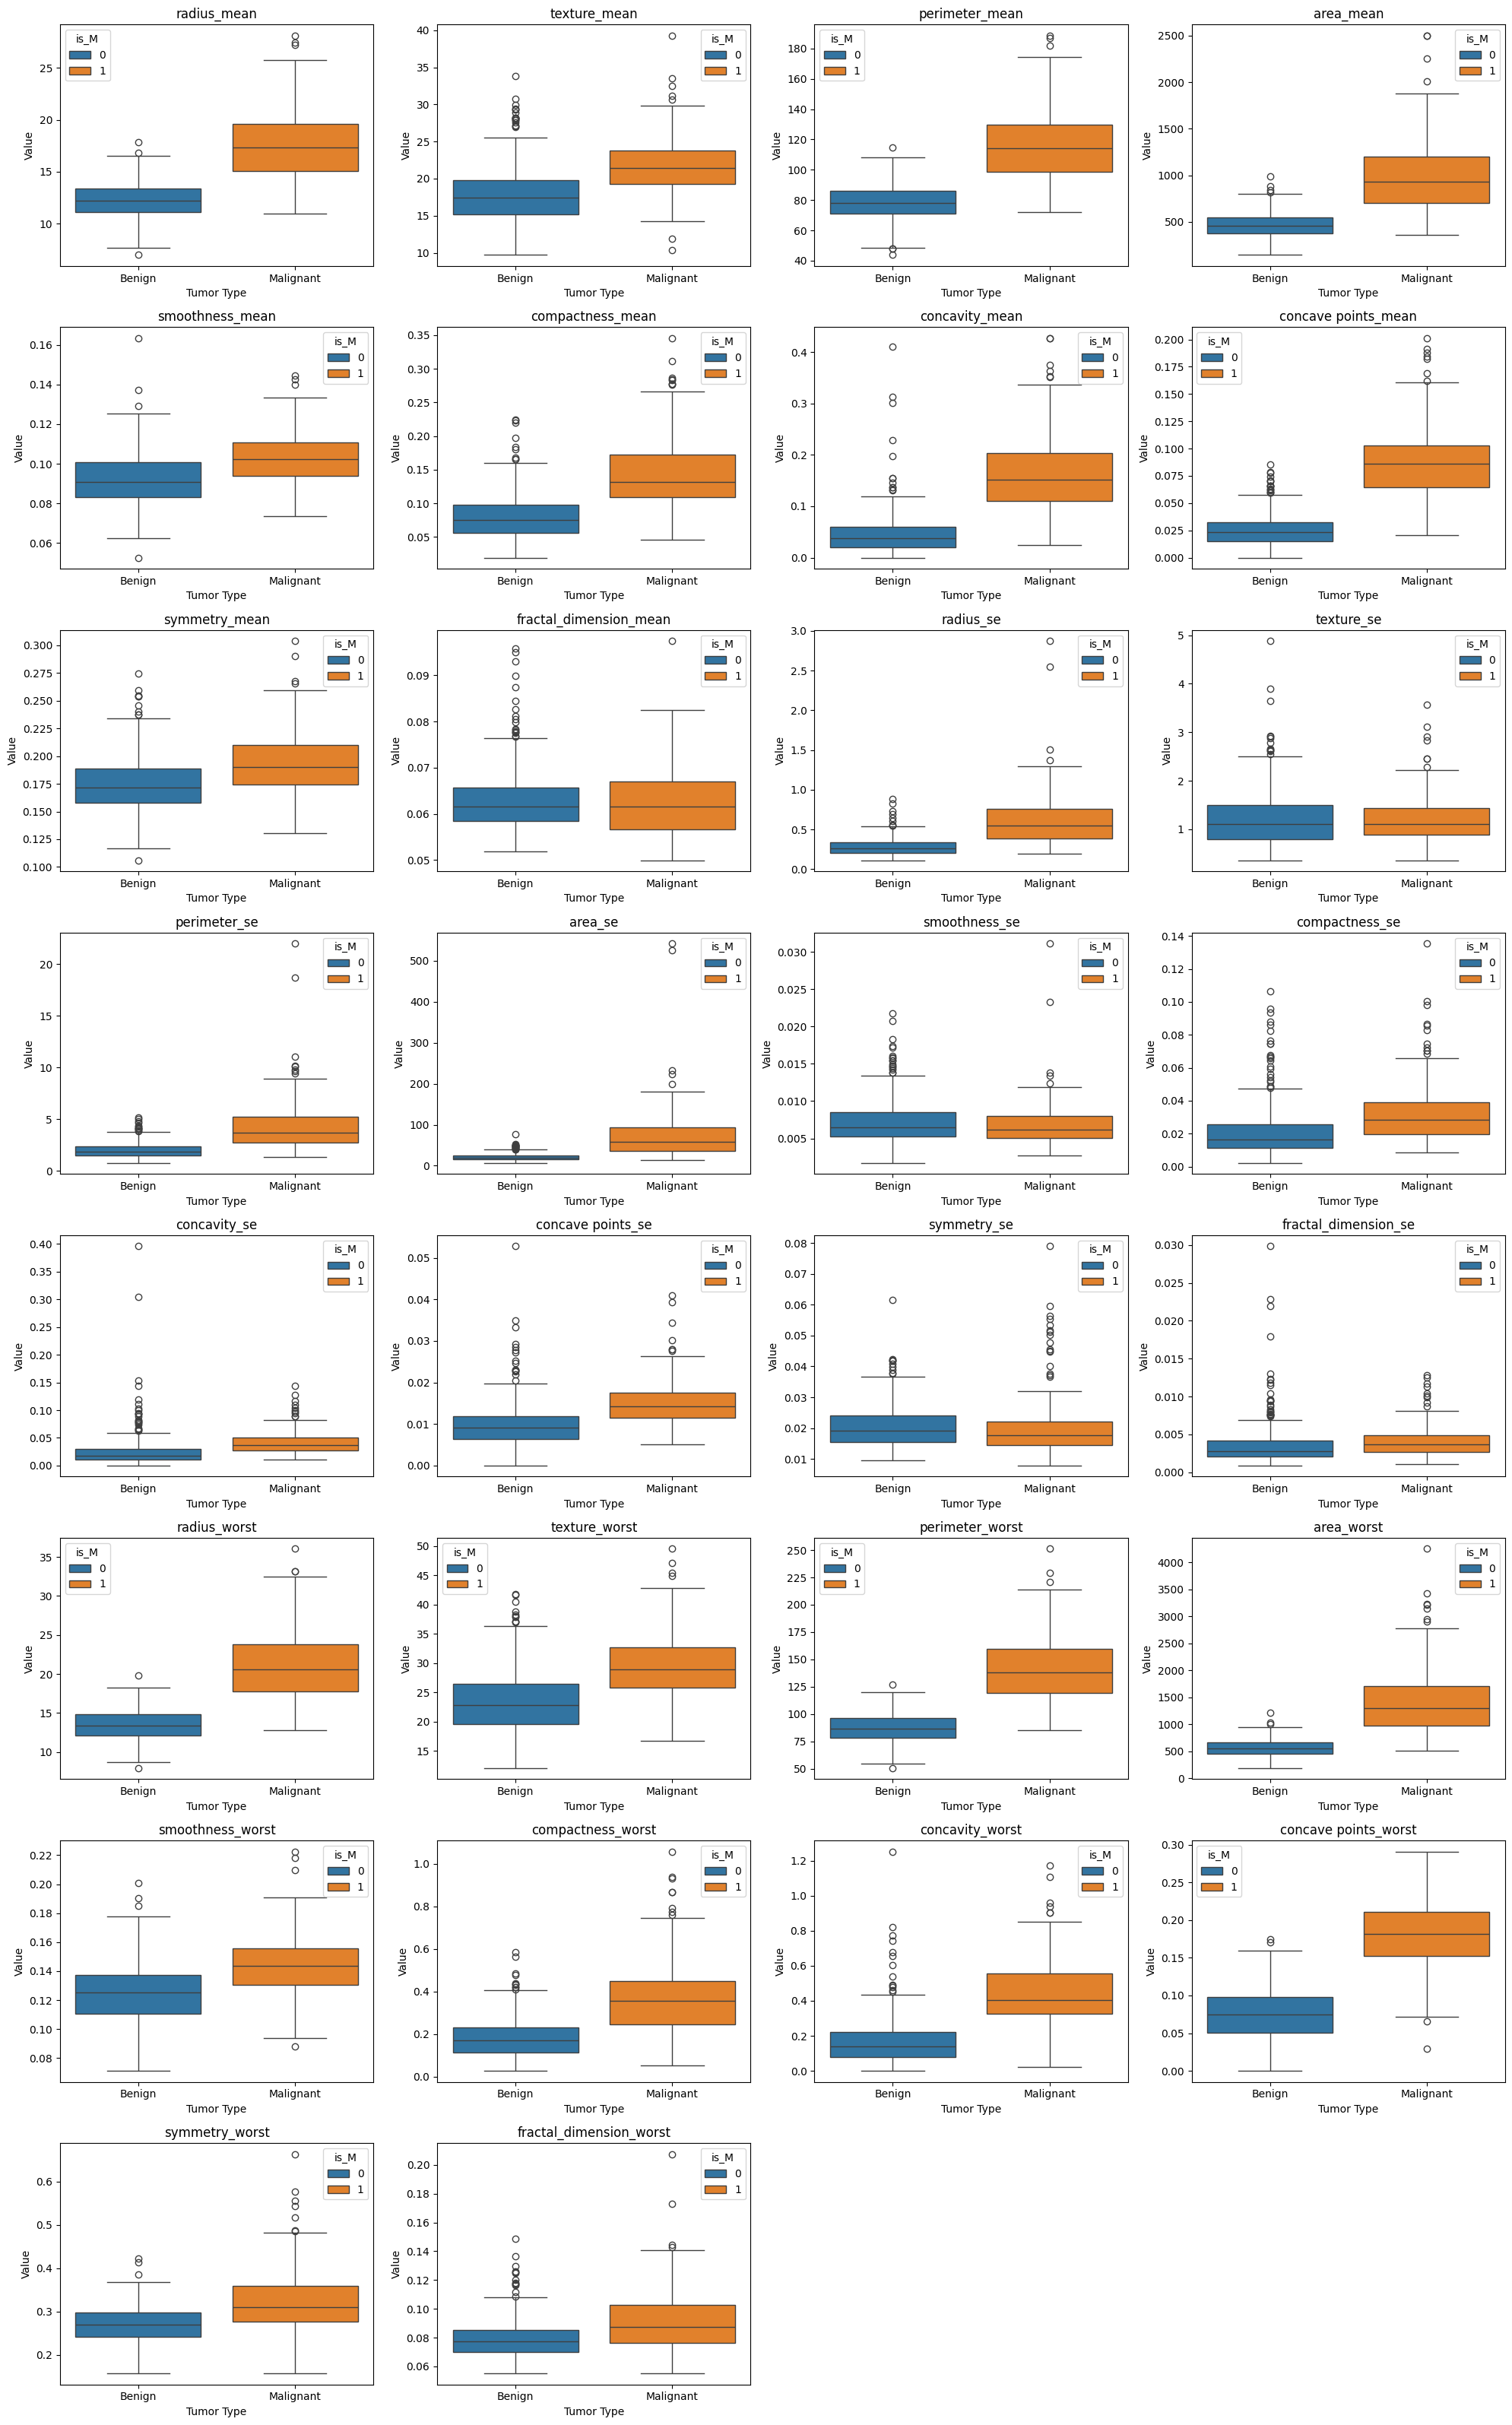

In [930]:
cols_per_row = 4
total_plots = len(cols)
rows = (total_plots + cols_per_row - 1) // cols_per_row

plt.figure(figsize=(20, 4 * rows))

for idx, feature in enumerate(cols):
    plt.subplot(rows, cols_per_row, idx + 1)
    sns.boxplot(x='is_M', y=feature, data=df, hue ='is_M')
    plt.title(feature)
    plt.xlabel('Tumor Type')
    plt.ylabel('Value')
    plt.xticks([0, 1], ['Benign', 'Malignant'])

plt.tight_layout()
plt.show()

## Pairplot Visualization

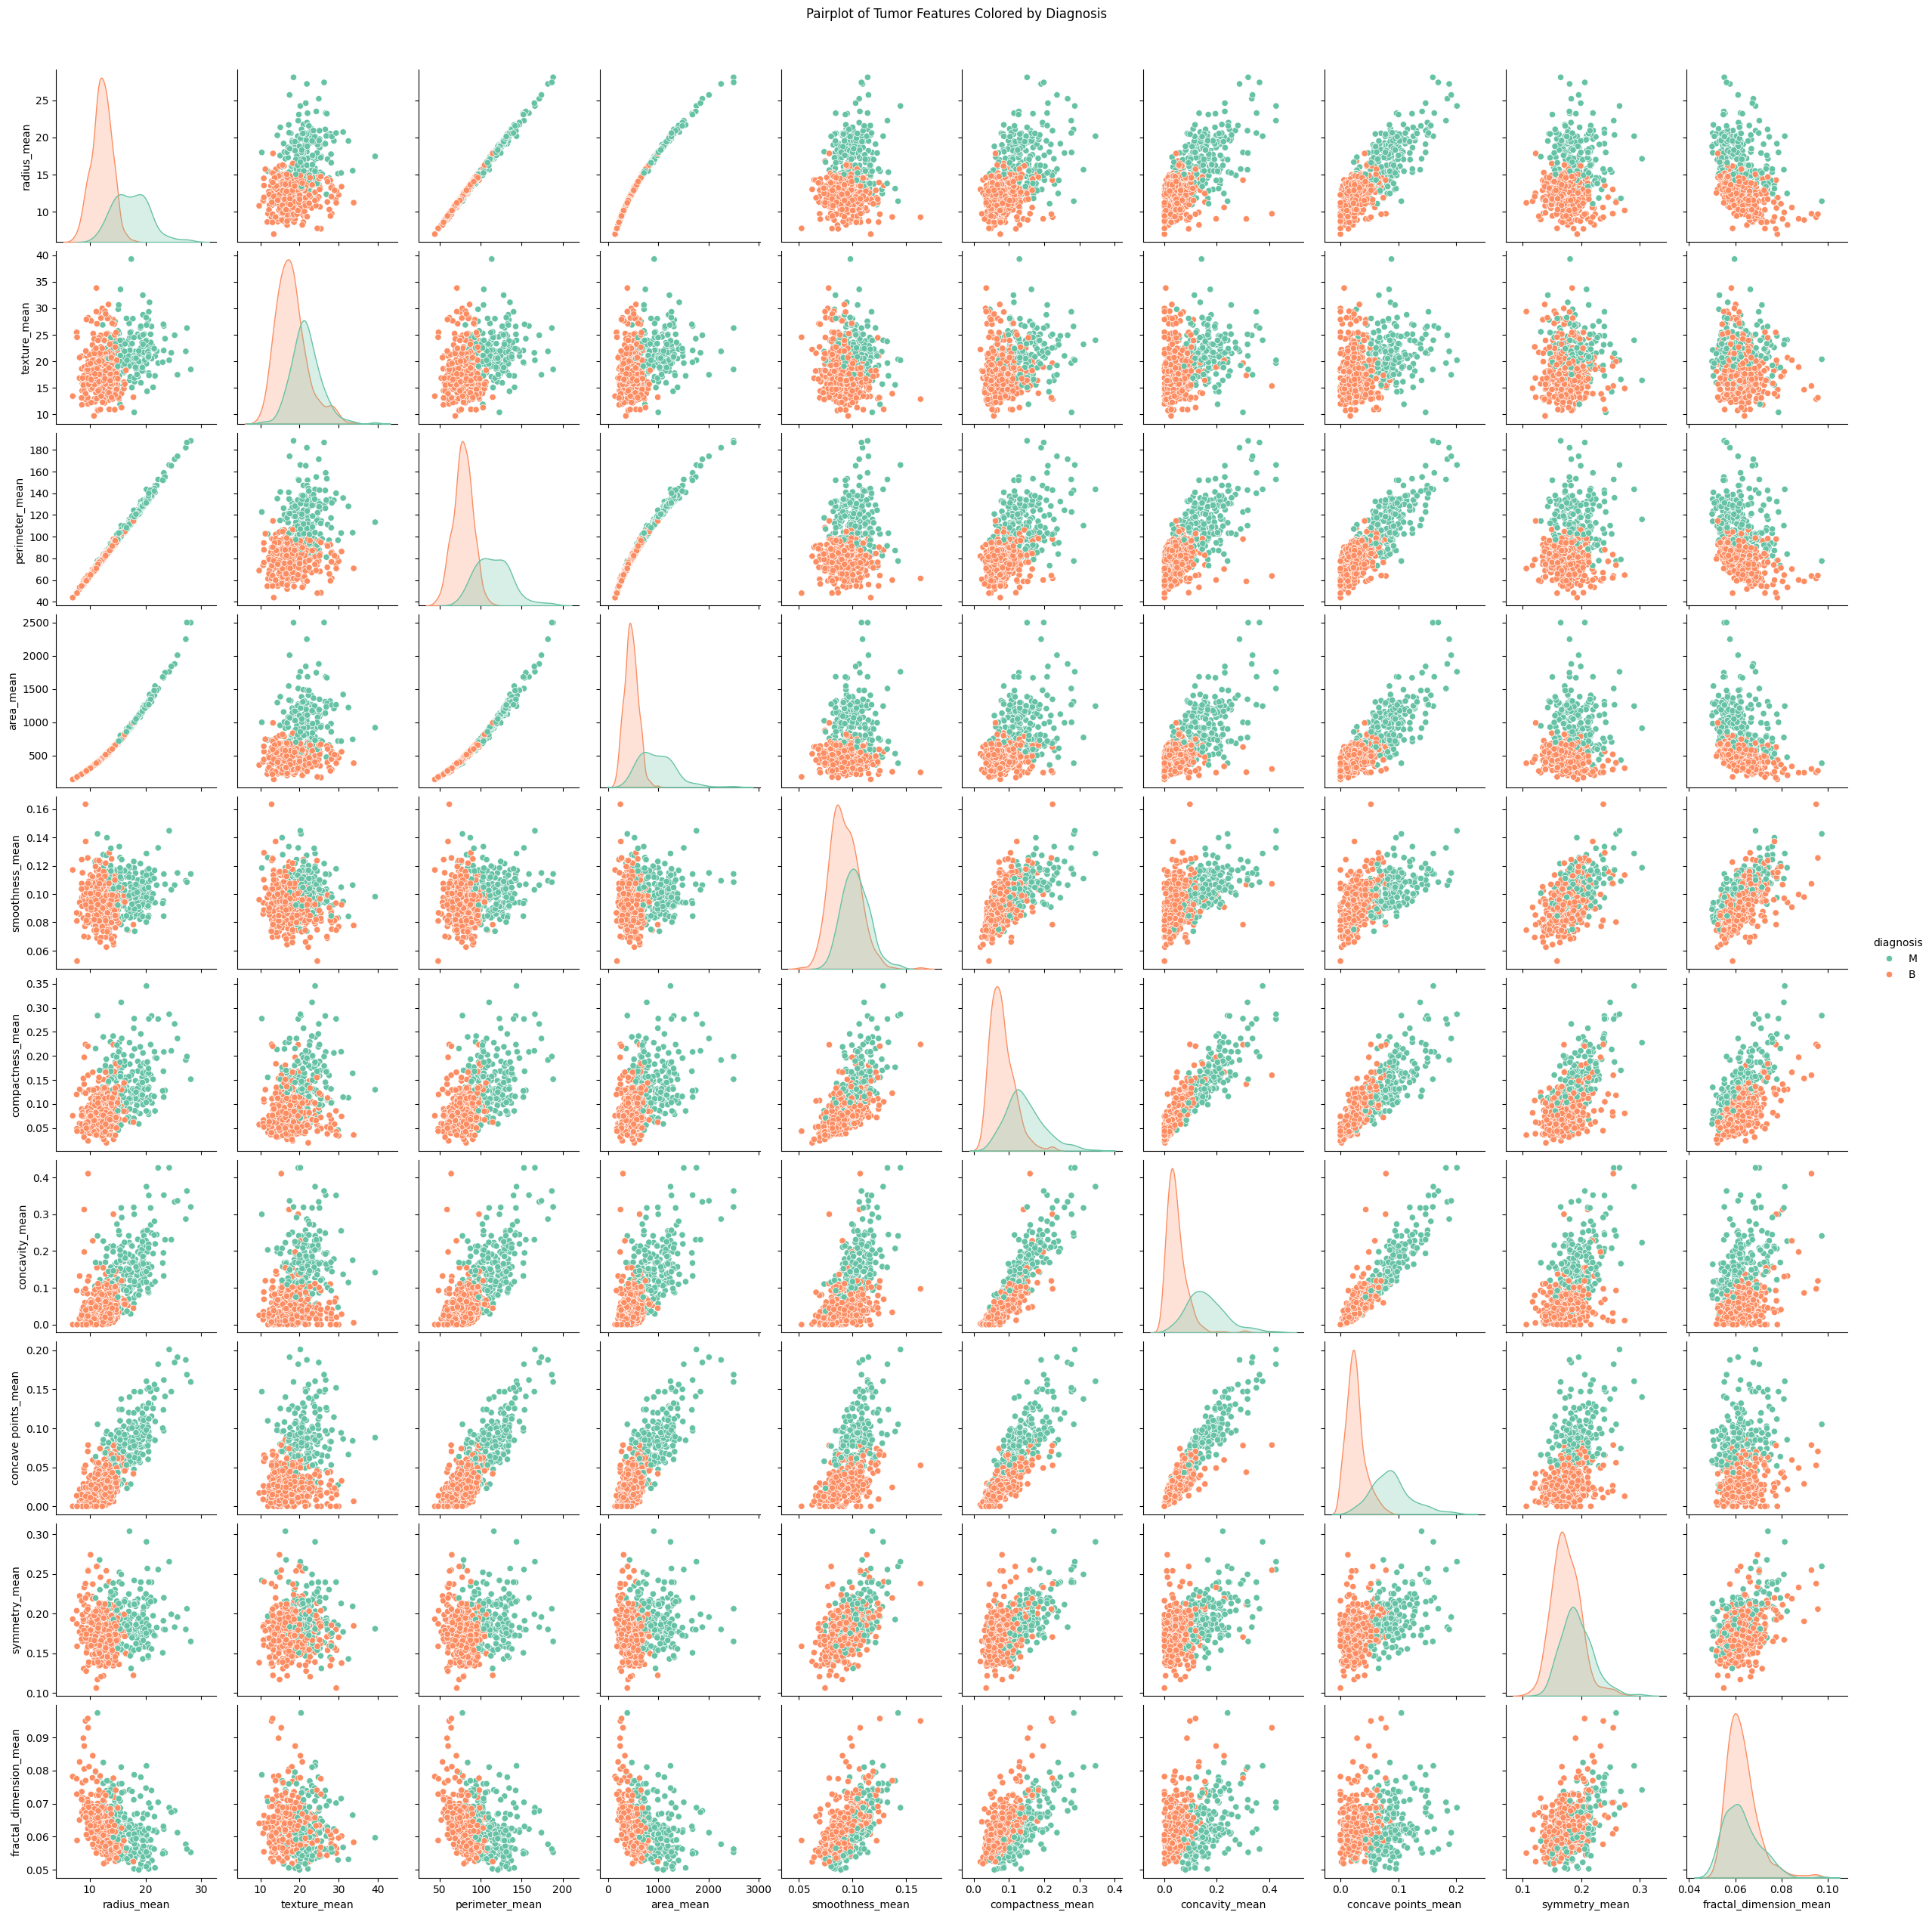

In [931]:
cols = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

sns.pairplot(data = df,
             x_vars=cols,
             y_vars = cols,
             diag_kind = "kde",
             hue = 'diagnosis',
             palette = 'Set2')

plt.suptitle("Pairplot of Tumor Features Colored by Diagnosis", y=1.02)
plt.show()

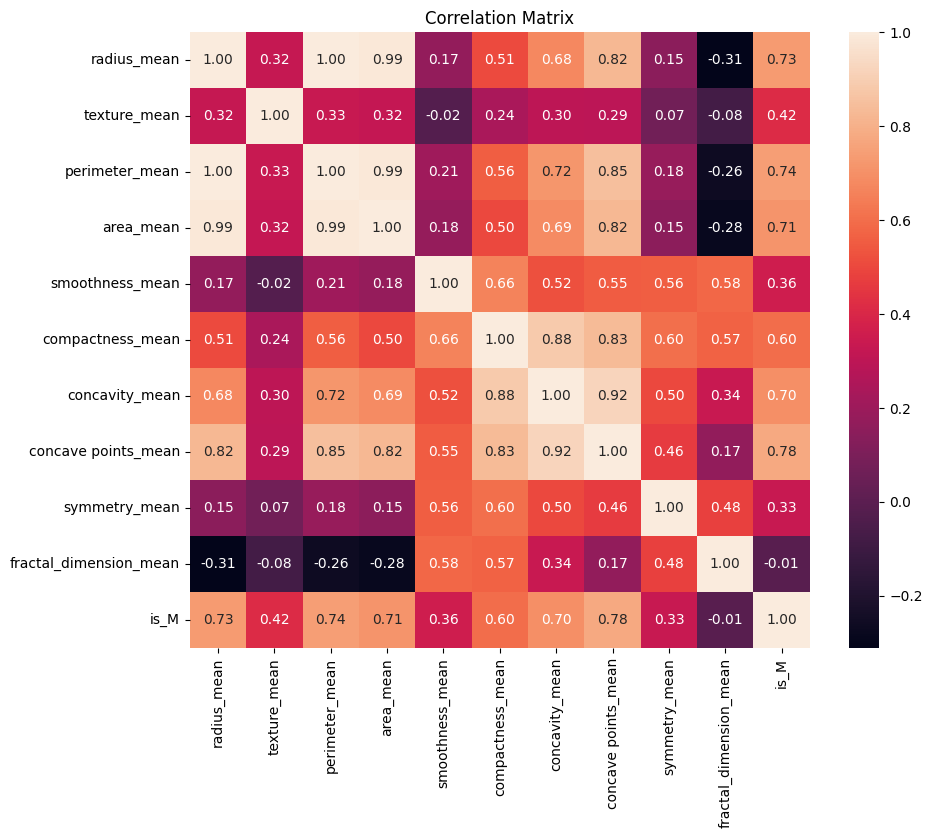

In [932]:
plt.figure(figsize=(10, 8))
corr_matrix = df[cols+['is_M']].corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In the box-and-whisker plot and the pairplot, there is a clear separation of benign tumors (orange) and malignant tumors (green). The values associated with malignant tumors tend to lie further above and to the right of those of benign tumors. This suggests that, on average, malignant tumors tend to be more extreme in nearly all recorded features aside from the fractal dimension, symmetry, and smoothness. We also see that most of these features have a positive correlation with each other, that is that as the values of one feature increases so do the values of other features. Radius, area, and perimeter are very tightly correlated with one another. As they are all physical, geometric measurements to do with the size of the tumor itself, it makes a lot of sense that this would be the case.

## Linear Regression
How well can we use linear regression to predict whether or not a tumor is benign or malignant? We will begin by standardizing our data. This will ensure that our models function appropriately later down the line.

In [933]:
scaler = StandardScaler()

X = df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']]

X_scaled = scaler.fit_transform(X)
df[['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']] = X_scaled

df

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M     1.097064     -2.073335        1.269934   0.984375   
1      842517         M     1.829821     -0.353632        1.685955   1.908708   
2    84300903         M     1.579888      0.456187        1.566503   1.558884   
3    84348301         M    -0.768909      0.253732       -0.592687  -0.764464   
4    84358402         M     1.750297     -1.151816        1.776573   1.826229   
..        ...       ...          ...           ...             ...        ...   
564    926424         M     2.110995      0.721473        2.060786   2.343856   
565    926682         M     1.704854      2.085134        1.615931   1.723842   
566    926954         M     0.702284      2.045574        0.672676   0.577953   
567    927241         M     1.838341      2.336457        1.982524   1.735218   
568     92751         B    -1.808401      1.221792       -1.814389  -1.347789   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0           1.568466          3.283515        2.652874             2.532475   
1          -0.826962         -0.487072       -0.023846             0.548144   
2           0.942210          1.052926        1.363478             2.037231   
3           3.283553          3.402909        1.915897             1.451707   
4           0.280372          0.539340        1.371011             1.428493   
..               ...               ...             ...                  ...   
564         1.041842          0.219060        1.947285             2.320965   
565         0.102458         -0.017833        0.693043             1.263669   
566        -0.840484         -0.038680        0.046588             0.105777   
567         1.525767          3.272144        3.296944             2.658866   
568        -3.112085         -1.150752       -1.114873            -1.261820   

     ...  perimeter_worst  area_worst  smoothness_worst  compactness_worst  \
0    ...         2.303601    2.001237          1.307686           2.616665   
1    ...         1.535126    1.890489         -0.375612          -0.430444   
2    ...         1.347475    1.456285          0.527407           1.082932   
3    ...        -0.249939   -0.550021          3.394275           3.893397   
4    ...         1.338539    1.220724          0.220556          -0.313395   
..   ...              ...         ...               ...                ...   
564  ...         1.752563    2.015301          0.378365          -0.273318   
565  ...         1.421940    1.494959         -0.691230          -0.394820   
566  ...         0.579001    0.427906         -0.809587           0.350735   
567  ...         2.303601    1.653171          1.430427           3.904848   
568  ...        -1.432735   -1.075813         -1.859019          -1.207552   

     concavity_worst  concave points_worst  symmetry_worst  \
0           2.109526              2.296076        2.750622   
1          -0.146749              1.087084       -0.243890   
2           0.854974              1.955000        1.152255   
3           1.989588              2.175786        6.046041   
4           0.613179              0.729259       -0.868353   
..               ...                   ...             ...   
564         0.664512              1.629151       -1.360158   
565         0.236573              0.733827       -0.531855   
566         0.326767              0.414069       -1.104549   
567         3.197605              2.289985        1.919083   
568        -1.305831             -1.745063       -0.048138   

     fractal_dimension_worst  Unnamed: 32  is_M  
0                   1.937015          NaN     1  
1                   0.281190          NaN     1  
2                   0.201391          NaN     1  
3                   4.935010          NaN     1  
4                  -0.397100          NaN     1  
..                       ...          ...   ...  
564                -0.709091          NaN     1  
565    

In [934]:
train_df, test_df = train_test_split(df, test_size=0.2, random_state=0, stratify=df['is_M'])

feature_sets = {
    "x1": ['radius_mean', 'compactness_mean', 'area_mean', 'concavity_mean', 'concave points_mean'],
    "x2": ['radius_worst', 'compactness_worst', 'area_worst', 'concavity_worst', 'concave points_worst']
}

train_y = train_df['is_M']
test_y = test_df['is_M']

The chosen features (radius, compactness, area, concavity, concave points) are all based on the above plots. I used the box and whisker plot as an indication of which features are likely to differ most from benign and malignant tumors. I used the pairplot to avoid using features that are likely colinear (mainly radius and perimeter).

In [935]:
print("Linear Regression:")
for name, features in feature_sets.items():
    train_x = train_df[features]
    test_x = test_df[features]
    
    model = LinearRegression()
    model.fit(train_x, train_y)
    score = model.score(test_x, test_y)
    print(f"{name} R² score: {score:.4f}")

Linear Regression:
x1 R² score: 0.6127
x2 R² score: 0.6835


As expected, linear regression is bad at predicting whether or not a tumor will be diagnosed as benign or malignant. This makes sense since linear regression is not optimal when it comes to classification. How do other classification methods do in comparison?

## Classification
Is the tumor benign or malignant?

Our goal is to attempt to classify each tumor as benign or malignant based on a set of provided features. I also wanted to compare whether it was more effective to characterize a tumor based on its mean measurements or based on it worst measurements.

In [936]:
model = LogisticRegression(max_iter=1000)

x1 = ['radius_mean', 'compactness_mean', 'area_mean', 'concavity_mean', 'concave points_mean']
X_train = train_df[x1]
X_test = test_df[x1]

model.fit(X_train, train_y)
pred_y = model.predict(X_test)
accuracy = accuracy_score(pred_y, test_y)
print(f"Mean Measurement Model Accuracy with Logistic Regression: {accuracy:.4f}")

Mean Measurement Model Accuracy with Logistic Regression: 0.9211


In [937]:
x2 = ['radius_worst', 'compactness_worst', 'area_worst', 'concavity_worst', 'concave points_worst']
X_train = train_df[x2]
X_test = test_df[x2]

model.fit(X_train, train_y)
pred_y = model.predict(X_test)
accuracy = accuracy_score(pred_y, test_y)
print(f"Mean Measurement Model Accuracy with Logistic Regression: {accuracy:.4f}")

Mean Measurement Model Accuracy with Logistic Regression: 0.9474


From both regressions, we can see that either method is a relatively effective way to classify the tumors in comparison to the linear regression method. The worst measurements for each tumor seem to be a slightly better than the mean measurements at reliably predicting whether or not a tumor will be diagnosed as benign or malignant. This could be because malignant tumors tend to be more aggressive and hence more extreme. Alternatively, it could be that cancer diagnosis standards depend on the worst measurements for any given tumor and as such, it is more reliable to predict the diagnosis with these measurements. Regardless of this, both models are able to reliably predict a diagnosis given that they both score very highly.

Test Accuracy for Logistic Regression: 0.9474
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        72
           1       0.93      0.93      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.94      0.94       114
weighted avg       0.95      0.95      0.95       114



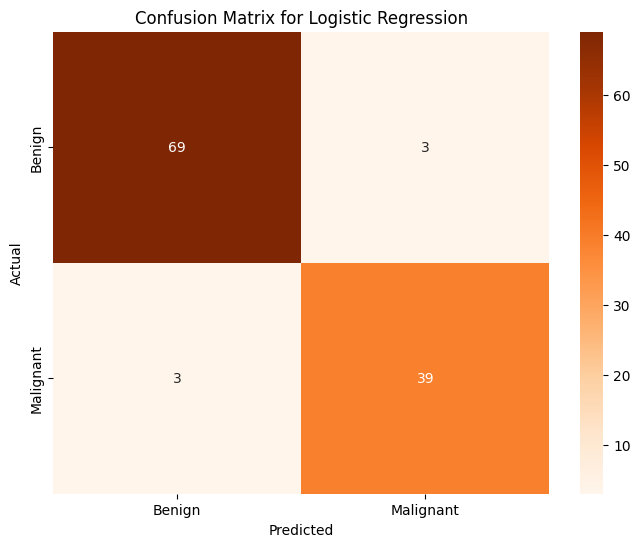

In [938]:
print(f'Test Accuracy for Logistic Regression: {accuracy_score(test_y, pred_y):.4f}') 

print('Classification Report for Logistic Regression:') 
print(classification_report(test_y, pred_y)) 

conf_matrix = confusion_matrix(test_y, pred_y) 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for Logistic Regression") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

With a 95% accuracy rate, it's very clear that a standard logistic regression on a handful of features does a great job predicting whether or not a tumor will be diagnosed as benign or malignant. Stopping here however, leaves open the possiblity of analysis on other features that were not included in the model. How can they help contribute to a diagnosis? To determine this, I attempted to use dimensionality reduction techniques, namely PCA and TSNE, paired with a few other classification/clustering methods (KNN, KMeans, Gradient Boosted Classification, traditional Logisitic Regression, etc).

# Dimensionality Reduction and Classification

## PCA Visualizations

### Strict PCA Dimensionality Reduction Preserving 95% Variance

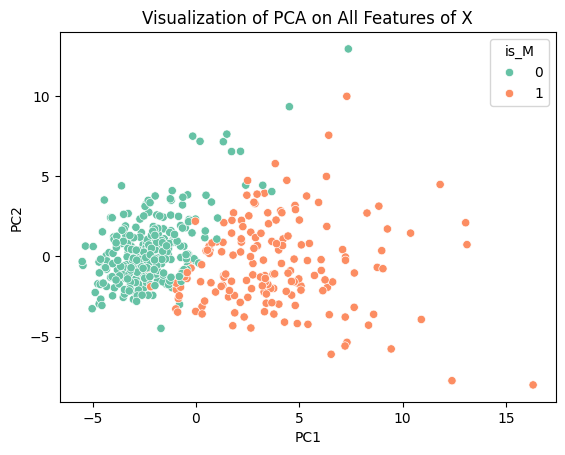

In [939]:
x = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

X = train_df[x]
X_test = test_df[x]

pca = PCA(n_components=2)

X_pca = pca.fit_transform(X)
X_test_pca = pca.transform(X_test)

sns.scatterplot(x = X_pca[:,0], y = X_pca[:,1], hue = train_y, palette = 'Set2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualization of PCA on All Features of X')
plt.show()

This scatterplot shows how there is clear clustering of benign and malignant tumors along PC1 and PC2. This specific dimensionality reduction takes away a lot of the variance that would have existed in the data but it allows for effective visualization. Now we will perform PCA once again on the dataset preserving 90% of the variance of the data, which we will then use for our classification models.

In [940]:
pca = PCA(n_components=.95)
X_pca = pca.fit_transform(X)
X_pca_test = pca.transform(X_test)

X_pca.shape

(455, 10)

In order to preserve 95% of the variance present in the dataset, we only need to use 10 principle components. From here we must apply classification models onto our data. First we will begin with a standard logistic regression and see how that does.

### Logistic Regression

Accuracy of Logistic Regression on PCA on Training Data: 0.991209
Accuracy of Logistic Regression on PCA on Testing Data: 0.956140


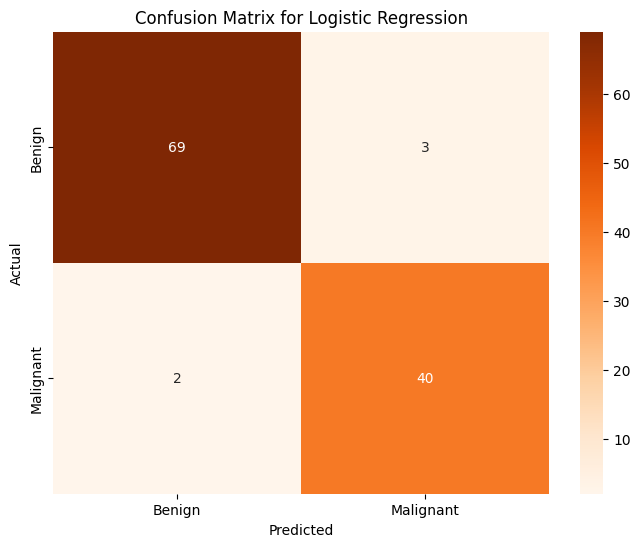

In [941]:
clf = LogisticRegression(max_iter = 1000)
clf.fit(X_pca, train_y)
pred_y = clf.predict(X_pca_test)

print(f'Accuracy of Logistic Regression on PCA on Training Data: {accuracy_score(train_y, clf.predict(X_pca)):4f}')
print(f'Accuracy of Logistic Regression on PCA on Testing Data: {accuracy_score(pred_y, test_y):4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for Logistic Regression") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

This is an excellent first result, already outperforming our first model trained on specifically selected features. This lines up with our expectation because PCA effectively selects the "best features" to perform classification on. Let's continue with other classification methods and see how those do.

### KNN

Accuracy of KNN on PCA on Training Data: 0.986813
Accuracy of KNN on PCA on Testing Data: 0.956140


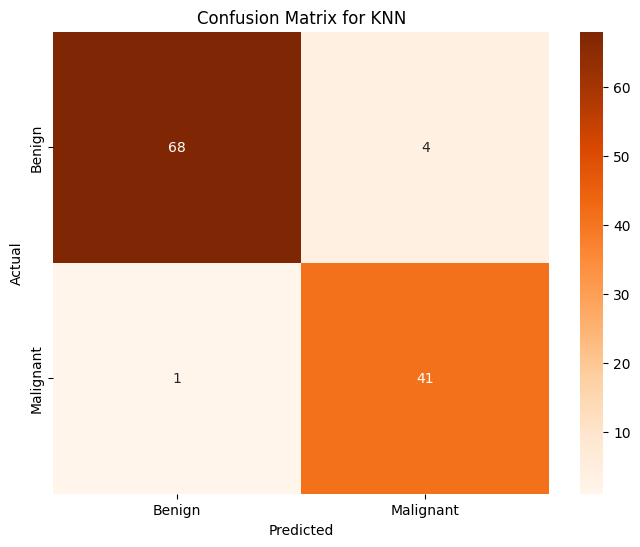

In [942]:
knn = KNeighborsClassifier(n_neighbors=3)

knn.fit(X_pca, train_y)
pred_y = knn.predict(X_pca_test)

print(f'Accuracy of KNN on PCA on Training Data: {accuracy_score(train_y, knn.predict(X_pca)):4f}')
print(f'Accuracy of KNN on PCA on Testing Data: {accuracy_score(pred_y, test_y):4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for KNN") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

This model performs just as well as traditional logistic regression does. This is a nice result as it means we have two very effective means of determining whether or not a tumor will be benign or malignant, which we can use to verify each other. Next, KMeans.

### KMeans

Accuracy of KMeans on PCA on Training Data: 0.909890
Accuracy of KMeans on PCA on Testing Data: 0.877193


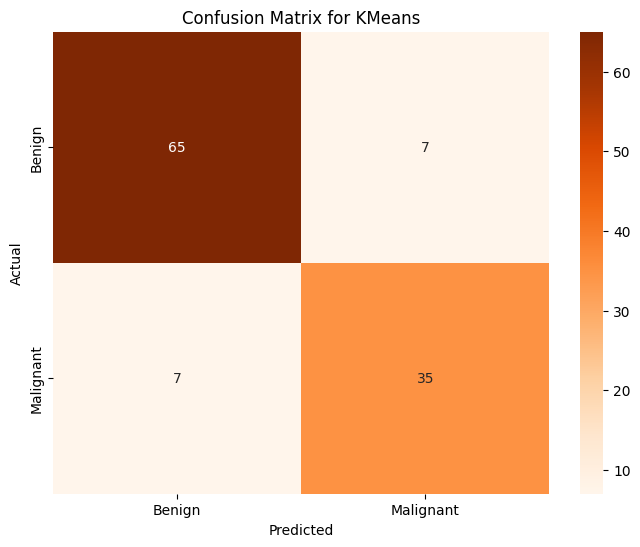

In [943]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(X_pca)
pred_y = kmeans.predict(X_pca_test)

print(f'Accuracy of KMeans on PCA on Training Data: {accuracy_score(train_y, kmeans.predict(X_pca)):4f}')
print(f'Accuracy of KMeans on PCA on Testing Data: {accuracy_score(pred_y, test_y):4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for KMeans") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

This model is notably worse than our other methods of classification that we used before this one, but this should not be entirely surprising since as we saw in the PCA visualization there is some overlap between the two clusters. Since K-means clusters are generally spherical, it will be difficult to accurately classify these into neat groups. Despite it not being as good, it is not a terrible classifier, certainly better than the linear regression we used at first. Next, we will use the Gradient Boosting Classifier.

### Gradient Boosting Classifier

Accuracy of GBC on PCA on Training Data: 1.000000
Accuracy of GBC on PCA on Testing Data: 0.912281


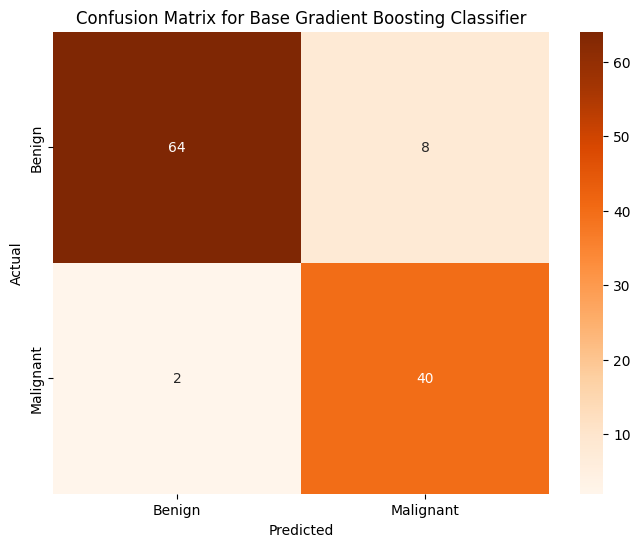

In [944]:
gbc = GradientBoostingClassifier()

gbc.fit(X_pca,train_y)
pred_y = gbc.predict(X_pca_test)

print(f'Accuracy of GBC on PCA on Training Data: {accuracy_score(train_y, gbc.predict(X_pca)):4f}')
print(f'Accuracy of GBC on PCA on Testing Data: {accuracy_score(pred_y, test_y):4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for Base Gradient Boosting Classifier") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

The model is perfectly accurate on the training dataset, but only 91% accurate on the testing dataset. As such, I believe there may be some level of overfitting that could be accounted for to make the model more accurate. From my brief research, I have found that increasing the min_samples_leaf parameter can help account for that.

### Gradient Boosting Classifier (GBC)

Accuracy of GBC on PCA on Training Data: 0.993407
Accuracy of GBC on PCA on Testing Data: 0.947368


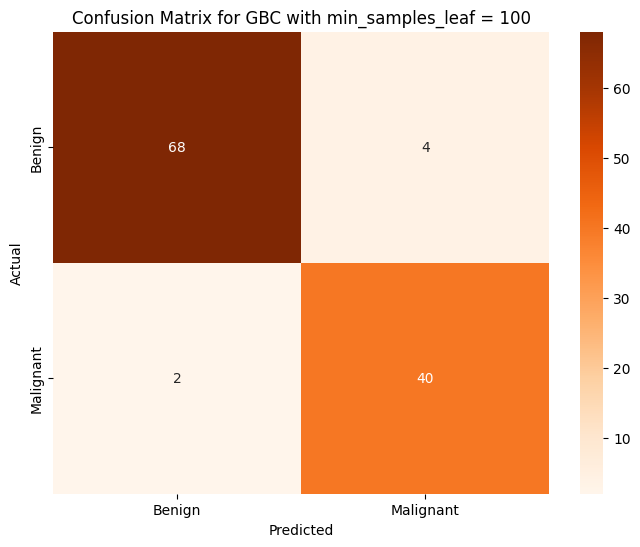

In [945]:
gbc = GradientBoostingClassifier(min_samples_leaf = 100)

gbc.fit(X_pca,train_y)
pred_y = gbc.predict(X_pca_test)

print(f'Accuracy of GBC on PCA on Training Data: {accuracy_score(train_y, gbc.predict(X_pca)):4f}')
print(f'Accuracy of GBC on PCA on Testing Data: {accuracy_score(pred_y, test_y):4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for GBC with min_samples_leaf = 100") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

Modifying this parameter improved the accuracy of our model, however it is still slightly worse than our logistic regression and KNN models. For the last classifier, we will use a Multilayer Perceptron Classifier (MLP Classifier).

### MLP Classifier

Accuracy of MLP Classifier on PCA on Training Data: 0.997802
Accuracy of MLP Classifier on PCA on Testing Data: 0.938596


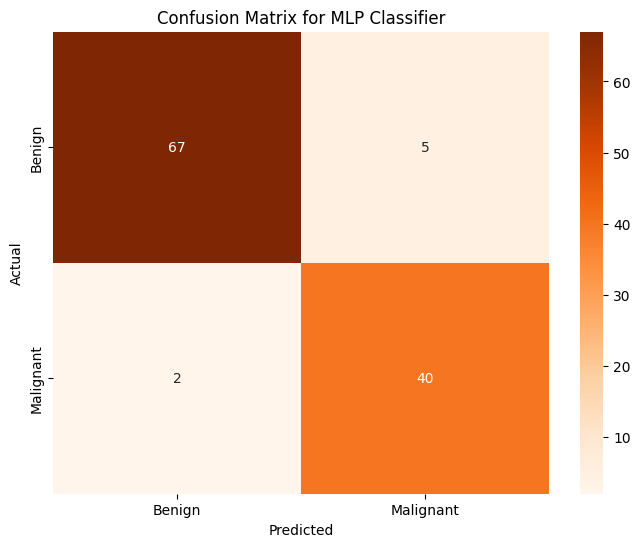

In [946]:
mlp = MLPClassifier(max_iter=1000)

mlp.fit(X_pca, train_y)
pred_y = mlp.predict(X_pca_test)

print(f'Accuracy of MLP Classifier on PCA on Training Data: {accuracy_score(train_y, mlp.predict(X_pca)):4f}')
print(f'Accuracy of MLP Classifier on PCA on Testing Data: {accuracy_score(pred_y, test_y):4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for MLP Classifier") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

This model is just as good as GBC but not as good as KNN or Logistic Regression.

# A Note on TSNE

Initially I was planning on using TSNE as another dimensionality reduction technique, however as I did so, I noticed that the data did not cluster as neatly as it did for PCA.

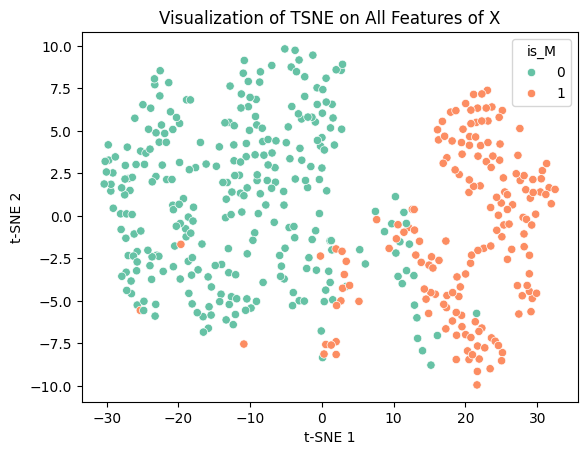

In [947]:
tsne = TSNE(n_components=2, perplexity=35, random_state=0)
X_tsne = tsne.fit_transform(X_train)

X_test_tsne = tsne.fit(X_test)

sns.scatterplot(x = X_tsne[:,0], y = X_tsne[:,1], hue = train_y, palette = 'Set2')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.title('Visualization of TSNE on All Features of X')
plt.show()


After doing some research, I found that TSNE is not a good form of dimensionality reduction to use when performing clustering/classification. This is because TSNE does not preserve distances as it is not a linear transformation. This is what makes it so effective for non-linear data, but also can be dangerous to use for the purposes of classification. As such, using any form of distance based clustering, like KMeans or K Nearest Neighbors, is not possible. TSNE can also fabricate trends or clusters that do not actually exist within the data, meaning a high likelihood of inaccurate results. Because of this, I decided to not use TSNE for my project. Despite that I think it does create some interesting to look at plots: 

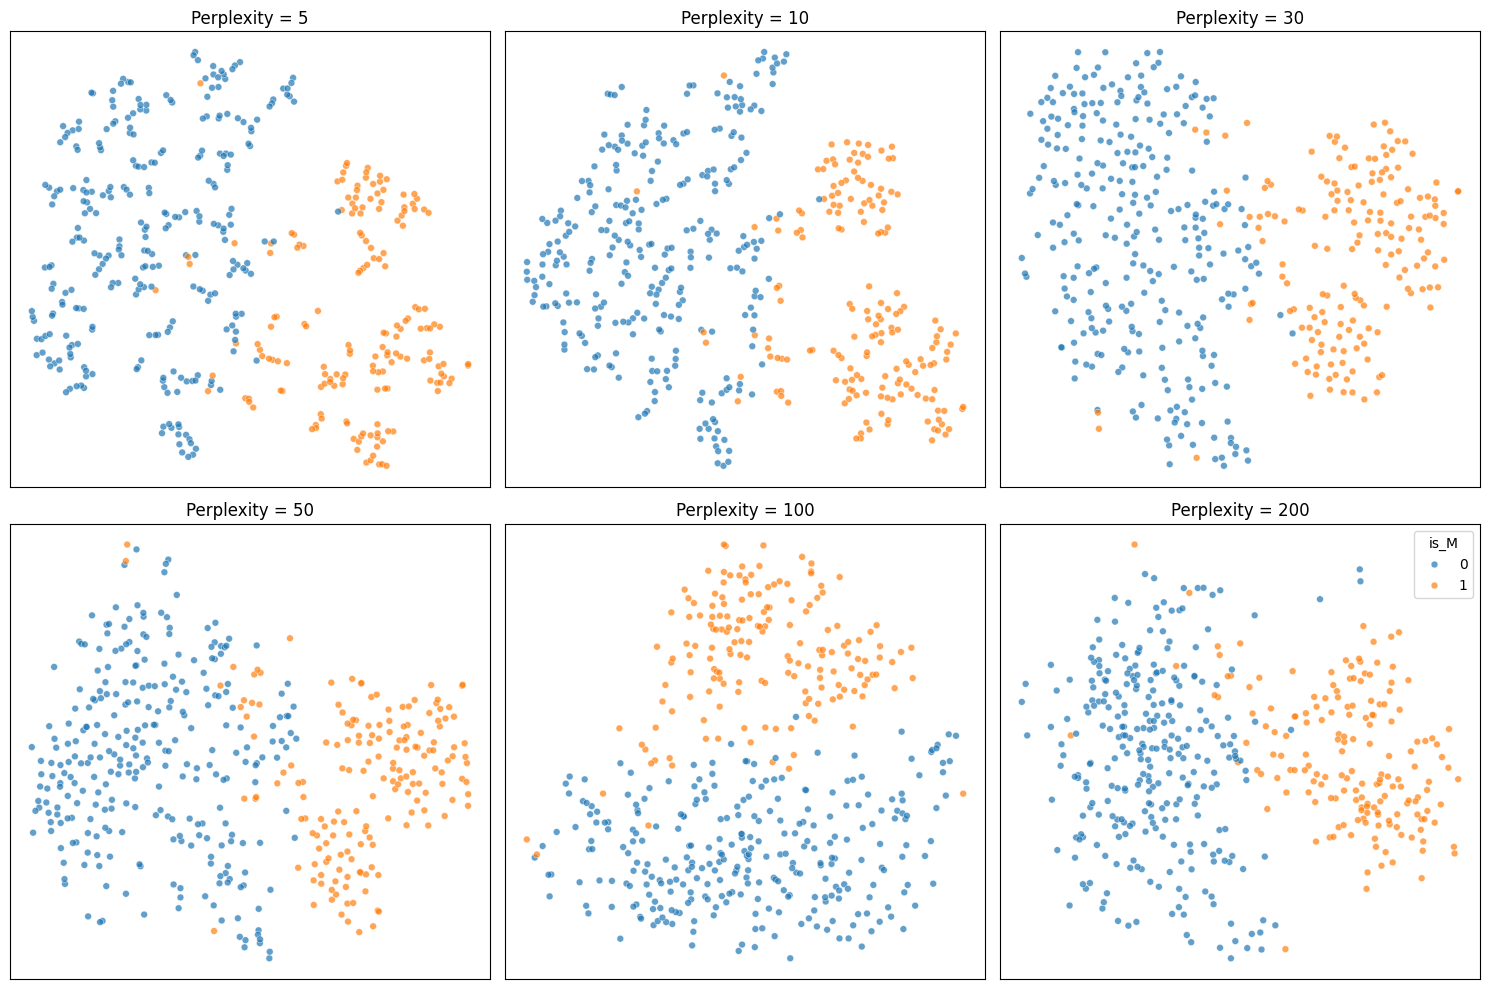

In [948]:
X = train_df[x].copy()
X_test = test_df[x].copy()

perplexities = [5, 10, 30, 50, 100, 200]
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i, (ax, perp) in enumerate(zip(axes.flat, perplexities)):
    tsne = TSNE(n_components=2, perplexity=perp, random_state=42)
    X_tsne = tsne.fit_transform(X)
    show_legend = 'full' if i == len(perplexities) - 1 else False
    sc = sns.scatterplot(
        x=X_tsne[:, 0], y=X_tsne[:, 1], hue=train_df['is_M'], s=24, alpha=0.7,
        palette='tab10', ax=ax, legend=show_legend
    )
    ax.set_title(f"Perplexity = {perp}")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

# Classification over the Whole Dataset
After some research for ways to improve the prediction, I found that clustering is often performed over the entire dataset or a sizeable subset of the dataset since most features contain some information that helps with classification. In most cases, using dimensionality reduction discards some of that information and can prevent highly accurate classification. The largest drawback of doing so is that runtime increases significantly as the number of features increases. For a larger dataset, it may not be feasible to do this, but this dataset contains only 569 individuals with a total of 30 features. As such, I will apply the same classification models to the whole dataset and compare the results to the results from the previous section.

### KMeans

KMeans Prediction Accuracy over whole dataset: 0.8772


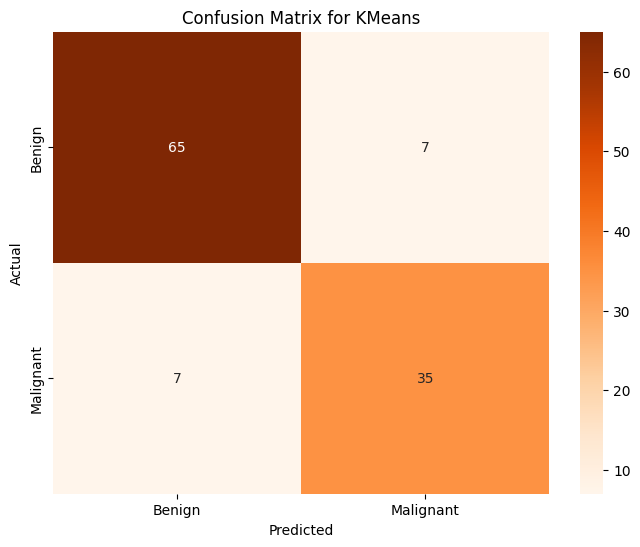

In [949]:
x = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

X = train_df[x]
X_test = test_df[x]

kmeans = KMeans(n_clusters=2, random_state=3)

kmeans.fit(X)
pred_y = kmeans.predict(X_test)

print(f'KMeans Prediction Accuracy over whole dataset: {accuracy_score(pred_y, test_y):.4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for KMeans") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

### K Nearest Neighbors (KNN)

KNN Prediction Accuracy over whole dataset: 0.9561


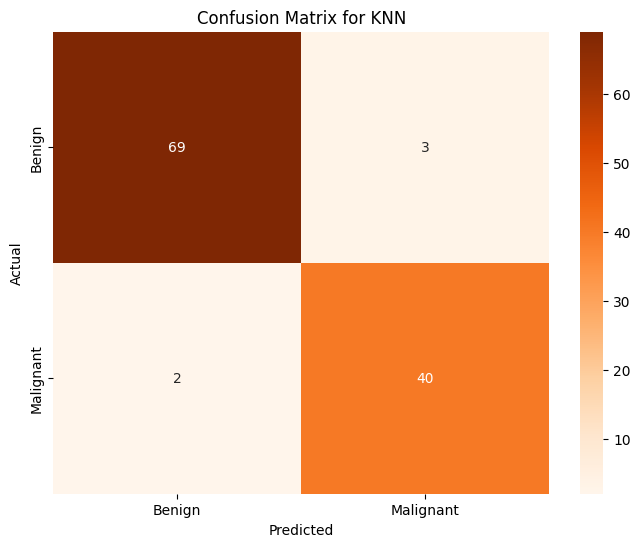

In [950]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X, train_y)
pred_y = knn.predict(X_test)

print(f'KNN Prediction Accuracy over whole dataset: {accuracy_score(pred_y, test_y):.4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for KNN") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

### Logistic Regression

Logistic Regression Prediction Accuracy over whole dataset: 0.9737


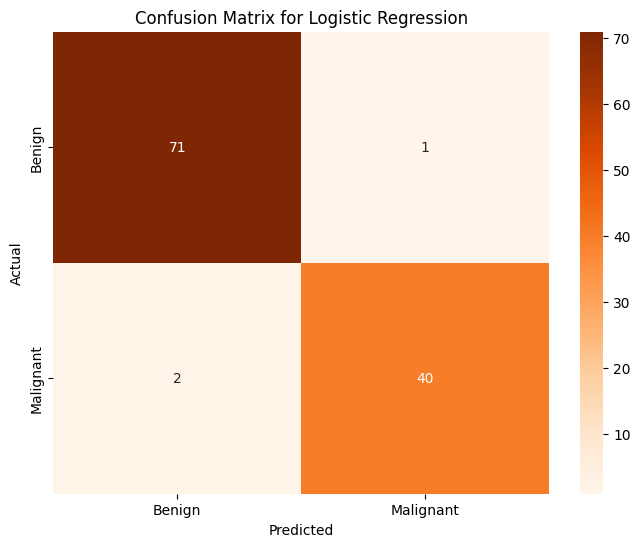

In [951]:
clf = LogisticRegression(max_iter = 1000)
clf.fit(X, train_y)
pred_y = clf.predict(X_test)

print(f'Logistic Regression Prediction Accuracy over whole dataset: {accuracy_score(pred_y, test_y):.4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for Logistic Regression") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

### Gradient Boosting Classifier

Gradient Boosting Classifier Prediction Accuracy over whole dataset: 0.9649


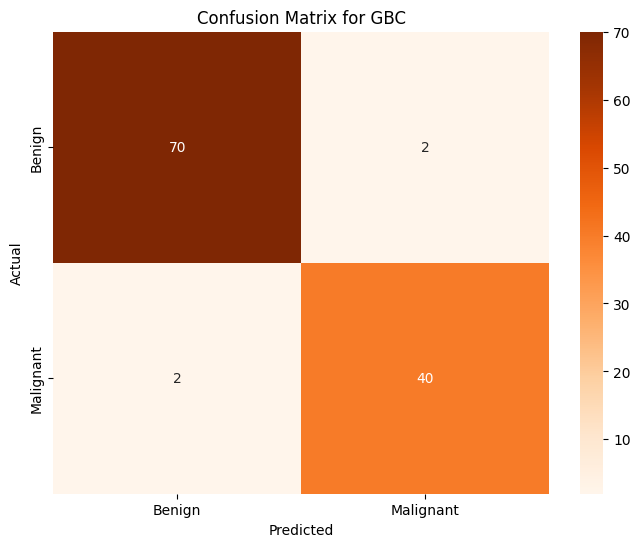

In [952]:
gbc = GradientBoostingClassifier()

gbc.fit(X,train_y)
pred_y = gbc.predict(X_test)

print(f'Gradient Boosting Classifier Prediction Accuracy over whole dataset: {accuracy_score(pred_y, test_y):.4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for GBC") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

### Multilayer Perceptron Classifier (MLP)

MLP Classifier Prediction Accuracy over whole dataset: 0.9737


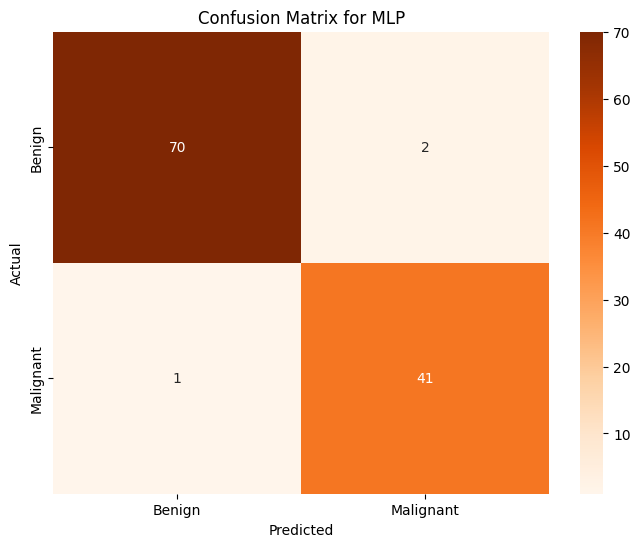

In [953]:
mlp = MLPClassifier(max_iter=1000, random_state=1)

mlp.fit(X, train_y)
pred_y = mlp.predict(X_test)

print(f'MLP Classifier Prediction Accuracy over whole dataset: {accuracy_score(pred_y, test_y):.4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for MLP") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 

### Decision Tree Classifier

Decision Tree Classifier Prediction Accuracy over whole dataset: 0.9649


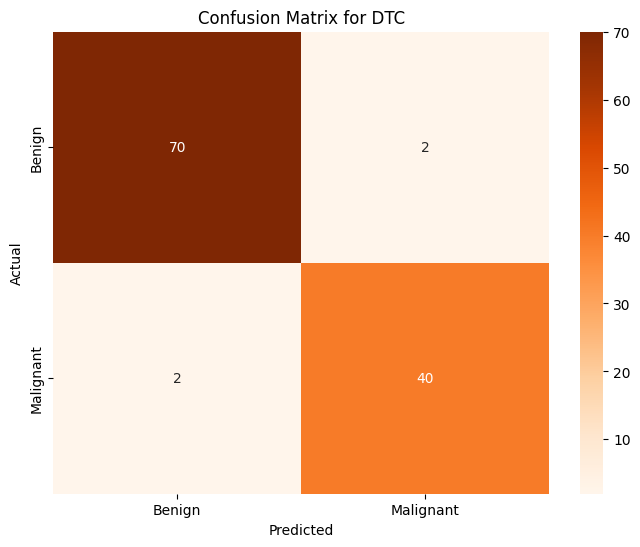

In [954]:
dtc = DecisionTreeClassifier(criterion='entropy', random_state=3)

dtc.fit(X, train_y)
pred_y = dtc.predict(X_test)

print(f'Decision Tree Classifier Prediction Accuracy over whole dataset: {accuracy_score(pred_y, test_y):.4f}')

conf_matrix = confusion_matrix(test_y, pred_y) 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for DTC") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 


All in all, most of these models are rather effective at determining the label (benign or malignant) that will be associated with any given tumor. The best classification models from the above are Logistic Regression (accuracy of 97.4%), MLP Classifier (accuracy of 97.4%), Gradient Boosting Classifier (accuracy of 96.5%), and Decision Tree Classifier (96.5%). Almost every single one of these models is more accurate than any model that we trained on our data that was transformed using PCA. The only model that is not effective is KMeans since its accuracy score is significant worse than the rest (accuracy of 87%) This is an expected outcome, however it is important to note that with a different dataset that has many more individuals and many more features per individual, it may not be reasonable to train these sorts of models on the entire dataset.

# Training My Own Neural Network
Even though I have very powerful classification models, I want see if it is possible to train my own neural network that can do this classification flawlessly. I'm unsure if this is possible, but it seems like an interesting challenge.

In [955]:
X_train_tensor = torch.tensor(train_x.values, dtype=torch.float32)
X_test_tensor = torch.tensor(test_x.values, dtype=torch.float32)
y_train_tensor = torch.tensor(train_y.values, dtype=torch.long)
y_test_tensor = torch.tensor(test_y.values, dtype=torch.long)


train_loader = DataLoader(TensorDataset(X_train_tensor,y_train_tensor), batch_size=32, shuffle=True)

Epoch 1, Loss: 0.6532
Epoch 2, Loss: 0.5424
Epoch 3, Loss: 0.3625
Epoch 4, Loss: 0.2831
Epoch 5, Loss: 0.3067
Epoch 6, Loss: 0.2491
Epoch 7, Loss: 0.2115
Epoch 8, Loss: 0.0762
Epoch 9, Loss: 0.1518
Epoch 10, Loss: 0.5755
Test Accuracy: 0.9298


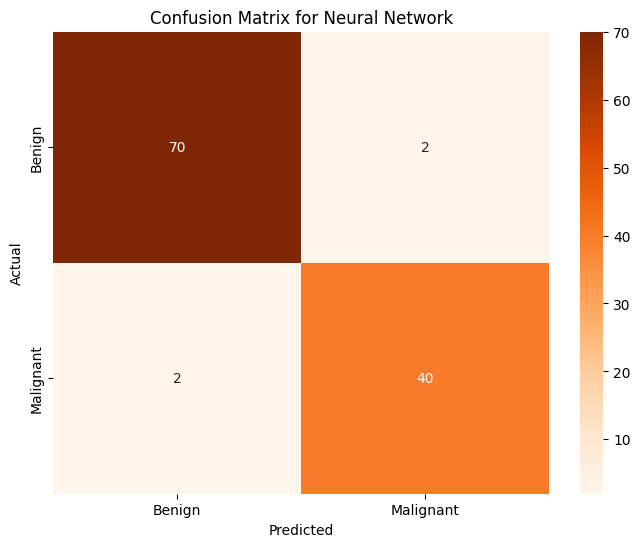

In [956]:
class TumorClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(train_x.shape[1], 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )

    def forward(self, x):
        return self.net(x)

model = TumorClassifier()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(10):
    for inputs, labels in train_loader:
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

with torch.no_grad():
    outputs = model(X_test_tensor)
    predictions = torch.argmax(outputs, dim=1)
    accuracy = (predictions == y_test_tensor).float().mean()
    print(f"Test Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(test_y, pred_y) 

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, 
    annot=True, 
    fmt="d", 
    cmap="Oranges", 
    xticklabels=["Benign", "Malignant"], 
    yticklabels=["Benign", "Malignant"])

plt.title("Confusion Matrix for Neural Network") 
plt.xlabel("Predicted") 
plt.ylabel("Actual") 
plt.show() 


The tumor classification model does not perform exactly the same each time, but the accuracy hovers around 94%. This is not bad, but it performs worse than logistic regression and KNN does. Ultimately, it seems like it is rather slow in comparison to the other models but perhaps with more data, it gets more accurate in comparison to the others.

# Conclusion
During the process of this project, I worked through building a model that can accurately diagnose cancer based on a variety of measurements. Initially, with linear regression, I had a very inaccurate classification model. Moving from there, using logistic regression and the same features, I was able to create a much more accurate classification model. Still I wanted to see if there was a way to make a more accurate classification model. Using PCA preserving 95% variance to improve computation time, I was able to create an even more accurate model with logistic regression and K nearest neighbors for classification. Finally, to check how our models would perform on the whole dataset, which tends to generate the most accurate models at the cost of dramatically incerased computation time, I was able to create the most accurate models at almost 98% accuracy with logistic regression and MLP Classification.

My foray into building up my own neural network was moderately successful. It was able to perform at approximately the same level as the best PCA models did. I believe that this neural network has space to improve as well.